In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta='Cap4/'
resBaseline = pd.read_pickle(ruta+'resultados_baselineFinal.pkl')
resGrape = pd.read_pickle(ruta+'resultados_grapeFinal.pkl')
resBaselineLabel = pd.read_pickle(ruta+'resultados_baselineLabelFinal.pkl')
resGrapeLabel = pd.read_pickle(ruta+'resultados_grapeLabelFinal.pkl')

datasets=['concrete','energy','housing','kin8nn','naval','power','protein','wine','yacht']

# Probamos las imputaciones

In [2]:
#Obtenemos la media de todos los experimentos

dfT = pd.DataFrame(columns = ["mae","rmse","mse","accuracy"])
for dataset in datasets:
    df=resGrape.xs(dataset).mean().to_frame().T.rename(index={0:dataset})
    dfT=pd.concat([dfT,df])
print(dfT)

               mae      rmse       mse  accuracy
concrete  0.089824  0.139932  0.019581       0.0
energy    0.141213  0.240212  0.057713       0.0
housing   0.076992  0.149500  0.022357       0.0
kin8nn    0.253379  0.294677  0.086920       0.0
naval     0.009173  0.023560  0.000559       0.0
power     0.102655  0.135108  0.018254       0.0
protein   0.027812  0.051127  0.002614       0.0
wine      0.063997  0.093026  0.008654       0.0
yacht     0.151955  0.249479  0.062262       0.0


In [4]:
#Obtenemos la desviación estandar de todos los experimentos
dfTd = pd.DataFrame(columns = ["mae","rmse","mse","accuracy"])
for dataset in datasets:
    df=resGrape.xs(dataset).std().to_frame().T.rename(index={0:dataset})
    dfTd=pd.concat([dfTd,df])
print(dfTd)

               mae      rmse       mse  accuracy
concrete  0.000118  0.000851  0.000238       0.0
energy    0.002669  0.003697  0.001789       0.0
housing   0.001913  0.002852  0.000859       0.0
kin8nn    0.006081  0.010320  0.006225       0.0
naval     0.000965  0.002339  0.000111       0.0
power     0.000344  0.000369  0.000100       0.0
protein   0.000147  0.000470  0.000048       0.0
wine      0.000537  0.000392  0.000073       0.0
yacht     0.004364  0.005295  0.002643       0.0


In [58]:
dfT.xs('concrete').to_frame().T.rename(index={'concrete':'grape'})

,mae,rmse,mse,accuracy
grape,0.089824,0.139932,0.019581,0.0


In [59]:
df=pd.concat([resBaseline.xs('concrete'),dfT.xs('concrete').to_frame().T.rename(index={'concrete':'grape'})])

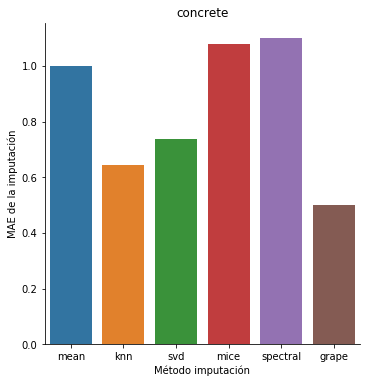

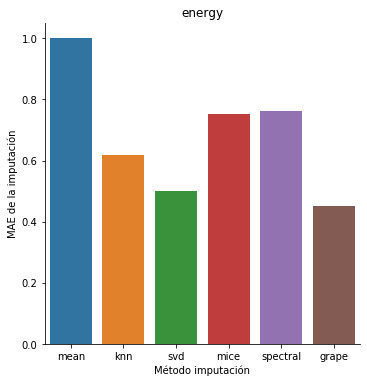

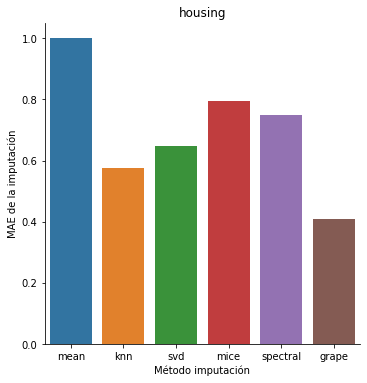

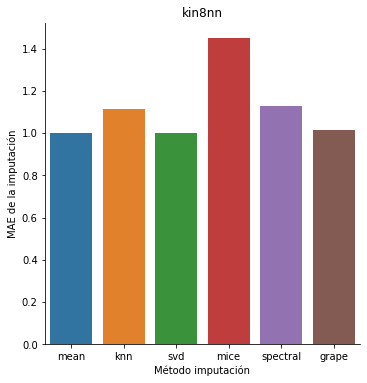

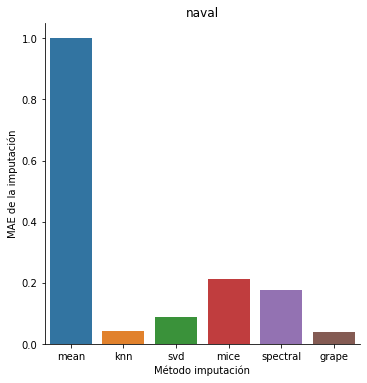

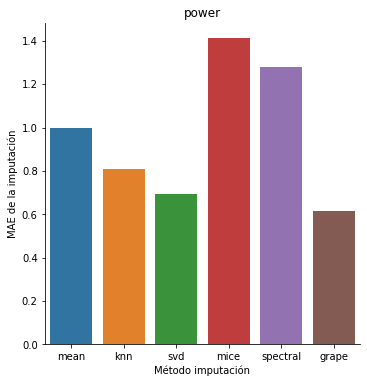

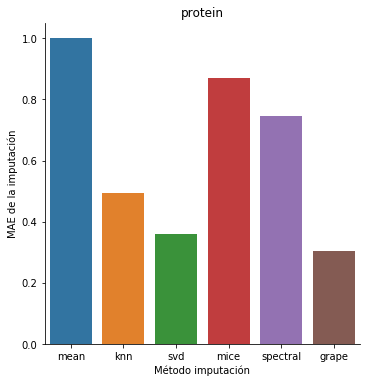

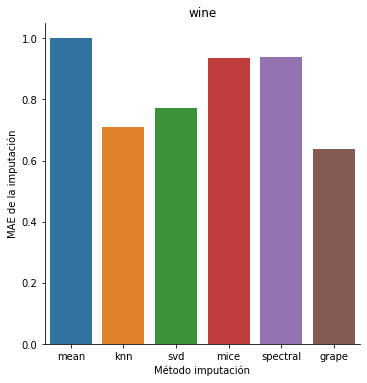

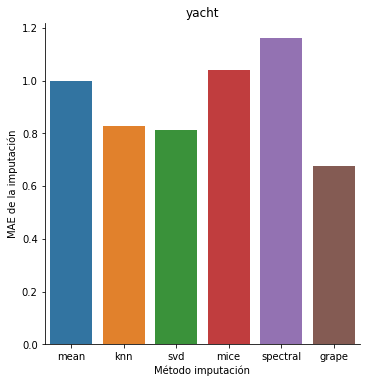

In [60]:

for dataset in datasets:
    df=pd.concat([resBaseline.xs(dataset),dfT.xs(dataset).to_frame().T.rename(index={dataset:'grape'})])
    df2=df
    df2['mae']=df['mae']/df['mae']['mean']
    #g=sns.catplot(kind="bar", data=df2.T[:1])
    g=sns.catplot(kind="bar", data=df2.T[:1])
    plt.ylabel("MAE de la imputación")
    plt.xlabel("Método imputación")
    plt.title(dataset) 
    plt.show(g)

# Probamos la predicción de Etiquetas

In [64]:
#Obtenemos la media de todos los experimentos

dfT = pd.DataFrame(columns = ["mae","rmse","mse","accuracy"])
for dataset in datasets:
    df=resGrapeLabel.xs(dataset).mean().to_frame().T.rename(index={0:dataset})
    dfT=pd.concat([dfT,df])
print(dfT)

               mae       rmse         mse  accuracy
concrete  8.452109  10.856245  117.903145       0.0
energy    1.859900   2.586993    7.507910       0.0
housing   2.786181   3.941212   15.562776       0.0
kin8nn    0.163053   0.205849    0.042375       0.0
naval     0.006582   0.007555    0.000057       0.0
power     4.560511   6.485624   42.063978       0.0
protein   4.105135   5.084917   25.858740       0.0
wine      0.548328   0.711251    0.505960       0.0
yacht     3.972826   8.320294   69.420854       0.0


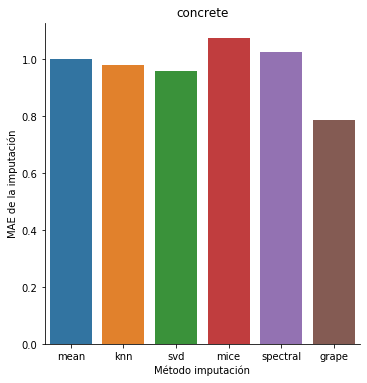

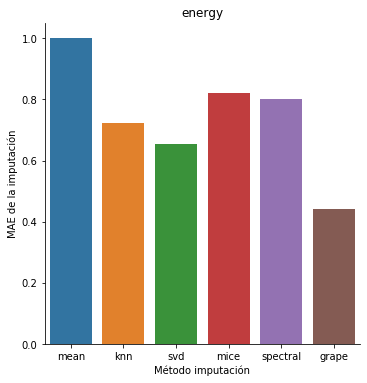

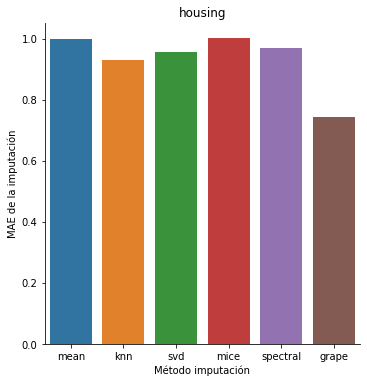

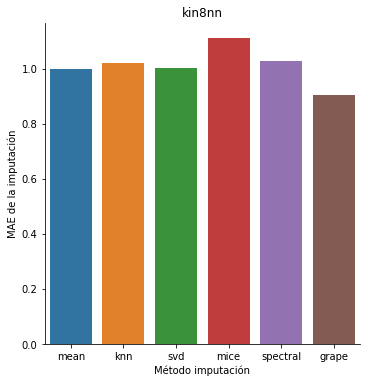

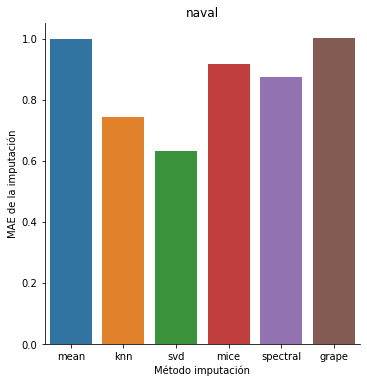

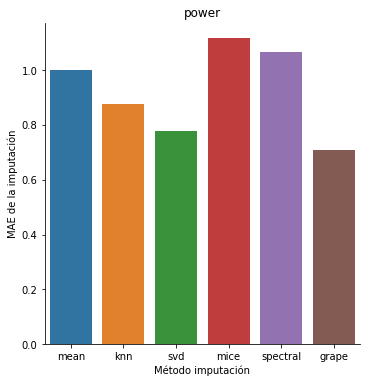

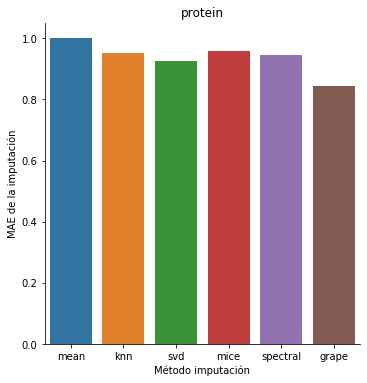

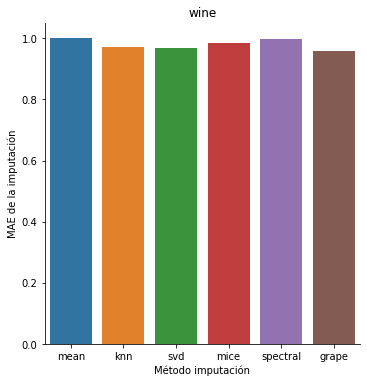

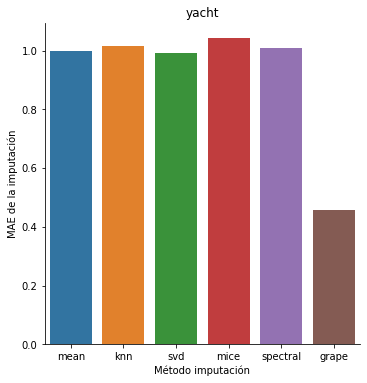

In [68]:
for dataset in datasets:
    df=pd.concat([resBaselineLabel.xs(dataset),dfT.xs(dataset).to_frame().T.rename(index={dataset:'grape'})])
    df2=df
    df2['mae']=df['mae']/df['mae']['mean']
    #g=sns.catplot(kind="bar", data=df2.T[:1])
    g=sns.catplot(kind="bar", data=df2.T[:1])
    plt.ylabel("MAE de la imputación")
    plt.xlabel("Método imputación")
    plt.title(dataset) 
    plt.show(g)